# Prediction of beam failure 
Sophie Le Lerre
sll64 
09437

## Introduction

The function of this code is to simulate the **brittle** failure in an end supported beam with one or two point loads. 
The general strategy for this analysis is divided in 3 phases: a first set of calculations for the beam whole (reaction, shear, bending moment...), a second set of calculations made on a population of points (Iterative Mohr's Analysis for each point on the beam) and finally general consideration of the data outputs (graphs and datasets). 

The final graph (depending on the initial inputs from the user) should resemble the picture below.

<img src="2020-04-26 (2).png">

In [1]:
#Beam Study
#These are the imported Libraries needed for this code to work

import numpy as np
from math import pi, tan
import matplotlib.pyplot as plt
import pylab as pl
from matplotlib import collections  as mc
import pandas as pd

## Data Entry 
### The materials 
The first step for the user is to choose the material from this list of brittle materials or add personal materials with their data in the respective columns.

>Even though the beam has 3 dimensions (length, height and width) this code does not take into consideration biaxial stresses. In other words, we consider the beam as shown in the figure below and consider the stresses distributed in the x y plane. 


In [2]:
data = pd.read_excel("materials.xls", sheet_name="Sheet4")
data

,Material,Tension Strength (Mpa or N/mm^2),Density (Kg/m^3),Carbon Kg CO2/Kg
0,"Bricks, hard",2.80,2000,0.220
1,"Bricks, light",0.28,450,0.220
2,"Brickwork, common quality",0.35,850,0.210
3,"Brickwork, best quality",2.10,850,0.210
4,Granite,4.80,2691,0.093
5,Limestone,2.10,2180,0.032
6,"Portand Concrete, 28 days old",1.40,2400,0.209
7,Sandstone,2.10,2323,0.064
8,Slate,3.50,1600,0.232
9,Trap rock,5.50,1746,0.079


In [3]:
import xlrd
workbook = xlrd.open_workbook('materials.xls')
worksheet = workbook.sheet_by_index(2)

In [4]:
#Input from the user
material_index = 6 #the default material is Portland concrete

### Ultimate Tensile Strength or Tension Stregth 
UTS is the Maximum stress a particular material can handle before brittle failure cracks occur. In brittle materials, such us concrete or stone, this is the crucial value to consider because failure will occur in the tensile because the tensile strength is much lower than the compressive strength. In other materials, such us timber or reinforced concrete (not included in the spresdsheet), cracks will occur after shear failure (that I'm not considering).

In [5]:
uts = worksheet.cell(material_index+1,1).value

### Data entry of the measurements of the real life situation
In the cell below the user has to type the measurements (length, loads...).
There is the possibility to have a maximum of 2 loads but in case of 1 load the user just has to consider the second load to be 0 kN. 

Secondly the user has to decide the precision of the whole analysis by typing the grid dimensions for the population of the points on the beam. (e.g. the more precision needed the smaller the gaps Δx and Δy need to be).

Finally, the user can insert the Factor of Safety (FoS). This addition is crucial to consider not only where the beam will crack but also where the stresses exceed the value permitted by the law regulations.


<img src="IMG-0467-1.png">

In [6]:
L = 5000 #mm  Length of the beam
d = 1000 #mm (d is the heigth of the beam)
b = 200 #mm (b is the widgth of the beam)

P1= 50 #kN  The magnitude of the first load
X1= 2000 #mm  The distance between the left corner of the beam and the position of the first load

P2= 50 #kN  The magnitude of the second load
X2= 3000 #mm  The distance between the left corner of the beam and the position of the second load

Δx = 50 #mm
Δy = 25 #mm

FoS= 2.5

## Calculation of the reactions

In [7]:
Ptot = P1 + P2

#moment about a : P1*X1 + P2*X2 = Vb*L
Vb = (P1*X1 + P2*X2)/L
Va = Ptot - Vb

print(Va,Vb)

50.0 50.0


## Shear Force and Bending Moment Diagrams
The code in the following cell is calculating the shear force and bending moment diagrams as functions of x, where the origin (0,0) is the bottom-left corner of the beam.

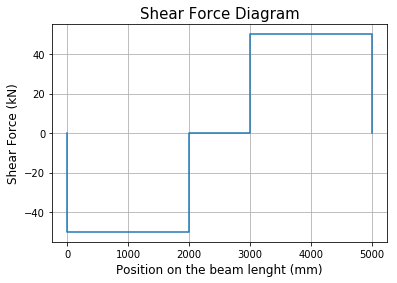

The values of the shear force are :  -50.0 , 0.0 , 50.0


In [8]:
#SHEAR FORCE DIAGRAM
def shear(x) :  
    if x < X1 :           #Interval 1
        S = Vb - P2 - P1
    elif X1 <= x <= X2 :  #Interval 2
        S = Vb - P2
    else :                #Interval 3
        S = Vb 
    return S #shear in kN

#Interval 1 : 0 <= x < X1
#Interval 2 : X1 <= x <= X2
#Interval 3 : X2 < x <= L

S1 = shear(0)
S2 = shear(X1)
S3 = shear(L)

#SHEAR FORCE GRAPH
x_shear = [0, 0, X1, X1, X2, X2, L, L]
y_shear = [0, -Va, -Va, 0, 0, Vb, Vb, 0]

plt.plot(x_shear, y_shear)
plt.title ('Shear Force Diagram', size = 15)
plt.xlabel ('Position on the beam lenght (mm)', size = 12)
plt.ylabel ('Shear Force (kN)', size = 12)
plt.grid()
plt.show()

print("The values of the shear force are : ", S1,",", S2,",", S3)

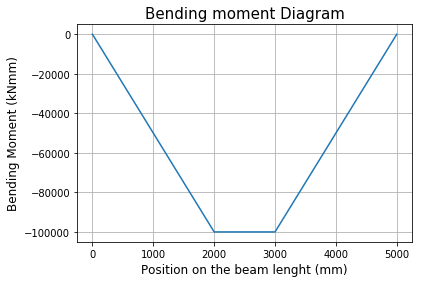

The critical values of the bending moment are :  -100000.0 , -100000.0


In [9]:
#BENDING MOMENT DIAGRAM
def moment(x) :
    if x < X1 :           #Interval 1
        M = S1 * x
    elif X1 <= x <= X2 :  #Interval 2
        M = (S2 * x) + (X1* (S1 - S2))
    else :                #Interval 3
        M = (S3 * x) - (S3 * L) 
    return M   #moment in kN*mm 

#BENDING MOMENT GRAPH
x_moment = [0, X1, X2, L]
y_moment = [0, moment(X1),moment(X2), 0]

plt.plot(x_moment,y_moment)
plt.title ('Bending moment Diagram', size = 15)
plt.xlabel ('Position on the beam lenght (mm)', size = 12)
plt.ylabel ('Bending Moment (kNmm)', size = 12)
plt.grid()
plt.show()

if P1 > P2 :
    Mmax = moment(X1)
else :
    Mmax = moment(X2)
    
print("The critical values of the bending moment are : ", moment(X1),",", moment(X2)) #moment in kN*mm 


## Neutral Axis and Second Moment of Area
This next cell is calculating the Neutral Axis (at half height of the beam) and the Second Moment of Area)

In [10]:
#CALCULATE THE NEUTRAL AXIS

na = 0.5 * d #mm
print ("The neutral axis is at", na, "mm of height")

#CALCULATE THE SECOND MOMENT OF AREA

I = (b * (d**3))/12 #mm^4

print("The second moment of area is", I/1000000, "x 10^6 mm^4")

The neutral axis is at 500.0 mm of height
The second moment of area is 16666.666666666664 x 10^6 mm^4


## Mohr's Circle Analysis
### Introduction
In the previous phase the calculations where made considering the whole beam and its external forces while this next phase consists on a set of calculations regarding one specific location on the beam. The same set of calculations is applied to a set of locations/points along the beam. 

This process is obtained defining a function (in this case called **Stress**), which has x and y as variables (respectively the horizontal and vertical distance from the origin (0,0), the bottom-left corner of the beam. 
This function is then applied to a grid of points created using a nested while loop for the y and x values. This nested loop creates a list of points coordinates (x,y) as the inputs for the **Stress** function. 

>**Note**: In this particular analysis the loop for the y axis is made for the values 0<y<na. This is because we are considering the areas of the beam where the beam is in tension, as brittle materials crack in tension.

### Formula Sheet 
-stress on the horizontal axix   $$σx = \frac{M(y-na)}{I}$$

-stress on the vertical axix   $$σx = 0$$

-shear stress $$τxy = \frac{S(A)ys}{I(b)}$$

-principal stresses $$σ1 = σav + \sqrt{\frac{(σx - σy)}{2}^2 + τxy^2 } $$
$$σ2 = σav - \sqrt{\frac{(σx - σy)}{2}^2 + τxy^2 } $$

In [11]:
#SINGLE POINT CALCULATIONS

def Stress(x, y) : #(na, I, b, d )
    M = moment(x)
    S = shear(x)
    
    #(d) calculate the stress on the horizontal axix ( σx )
    σx = (M *(10**3) * (y - na))/I #N/mm^2
    
    #(e) calculate the stress on the vertical axix ( σy )
    σy = 0
   
    #(f) calculate the shear stress (τxy)
    #ys is the distance between the local neutral axis and the total neutral axis
    ys= y + ((d-y)/2) - na 
    A = b*(d-y)
    τxy = (S * (10**3) * A * ys)/(I * b) #N/mm^2
    
    #Mohr's Circle Analysis
    #(g.1) σav is the average stress between σx and σy
    σav = (σx + σy)/2 #N/mm^2
    #(g.2) C(σav,0) is the centre of the circle
    #      A(σx,τxy) and B(σy,-τxy)
    # τmax is the maximum shear stress and radius of the circle
    τmax = ((((σx - σy)/2)**2) + τxy**2)**0.5 #N/mm^2
    
    #σ1 is the σmax maximum stress 
    #(is the important one to consider with brittle materials because is the maximum tensile/positive stress)
    σ1 = σav + τmax #N/mm^2
    #σ2 is the σmin minimum stress
    σ2 = σav - τmax #N/mm^2
   
    #ϑp is the angle of the first principle plane (σ1 and σ2, no shear stress)
    if σx == 0 and x < L/2:
        ϑp = -pi/4
    elif σx == 0 and x > L/2:
        ϑp = +pi/4
    elif σx == 0 and x == L/2:
        ϑp = 0
    else:
        ϑp = 0.5 * (np.arctan((2*τxy)/(σx - σy))) #in rad
    #print(ϑp*(180/pi))
    #ϑs is the angle of the second principle plane (σav and τmax maximum shear stress)
    ϑs = ϑp + (pi/4) #in rad
    
    #α is the direction of the crack (perpendicularly to the first principle plane)
    α = ϑp + pi/2 #in rad
    #print(α*(180/pi))
    α_degree = α *(180/pi)
    
    return σx, σy, τxy, σ1, σ2, ϑp, α, σav, τmax, ϑs, α_degree

The final output of this analyis is a graph which shows how the principal stress (sigma_1) is distributed along the beam. 
Sigma 1 is the maximum positive stress in the Mohr's Circle and it represents the tensile stress for each point plotted in the graph.
Each point is plotted using a color scheme created comparing the stress with the tensile strength of the chosen material.

### Legend
- **brown** (the points where the beam will immediately crack)
- **red** (the points where the beam will crack as the tensile stress > tensile strength )
- **green** (the points where the beam shoudn't crack but the tensile stress exceeds the regulations)
- **grey** (the points where the beam will not crack and the tensile stress < permitted tensile stress)


3.0


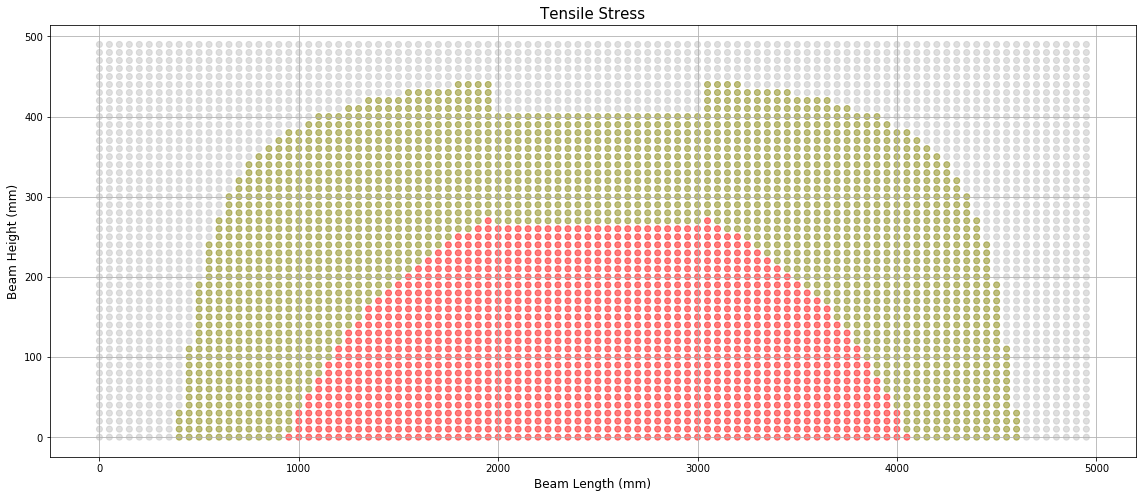

In [12]:
Yp = 0
xvals = []
color_list = []
list_principalstress = []
#complete_dataset = []

yvals = []
while Yp < na :
    Xp = 0
    while Xp < L :
        structures_data = Stress(Xp, Yp)
        #complete_dataset.append ((Xp, Yp),structures_data)
        list_principalstress.append(structures_data[3])
        if structures_data [3] >= uts*FoS :
            color = 'brown'
        elif structures_data [3] >= uts :
            color = 'red'
        elif structures_data [3] >= uts/FoS:
            color = 'olive'
        else :
            color = 'silver'
        color_list.append(color)
        xvals.append(Xp)
        yvals.append(Yp)
        Xp = Xp + (2*Δx/2)
    Yp = Yp + (2*Δy/5)
    
σmax_beam = max(list_principalstress)  
print(σmax_beam)
#print( Stress(X1, 0) )
#print(list_principalstress)


fig,  ax = plt.subplots(figsize=(16,7))
ax.scatter(xvals, yvals, alpha=0.5,	color= color_list )
plt.title ('Tensile Stress', size = 15)
plt.xlabel ('Beam Length (mm)', size = 12)
plt.ylabel ('Beam Height (mm)', size = 12)
plt.grid()
fig.tight_layout(pad=1)
ax.grid(True)

fig.savefig('Tensile Stress',	dpi=125)

> **Considerations on the graph above** :
looking at the graph the user can see how the magnitude of the tensile stress is distributed below the neutral axis.
Furthermore, the ideal situation for the user is a total grey graph showing that there are no areas in the beam where the stress is higher than the permitted values. If this is not the case the graph can be useful to address the areas under too much stress.

### Plotting the cracks on the beam
One of the outputs of the function **Stress**, which uses the Mohr's Analysis for each position on the beam, is the angle alfa: the direction of the crack in that particular position. This value is found using the Mohr’s Circle : the direction of the first principal plane is the plane where the maximum stress lies (ϑp). As a consequence, **the direction of the crack (alfa)** is perpendicular to the direction of the maximum positive tensile stress (ϑp). Therefore, given a location (Xp,Yp) we can find the inclination of the crack.

>The code used to plot one singular segment is taken from a Library ( _mc.LineCollection_ ). All the segments representing the cracks are then plotted with a **nested loop which makes vertically each crack** starting from a position on the neutral axis (finished that crack goes to the following point on the neutral axis). Each crack is made by plotting a small segment given a location (Xp,Yp), the projection of the segment on the y axis (delta y) and the inclination. This operation is looped until the point reaches the bottom end of the beam, giving as a result a continuous line from the neutral axis to the bottom of the beam.


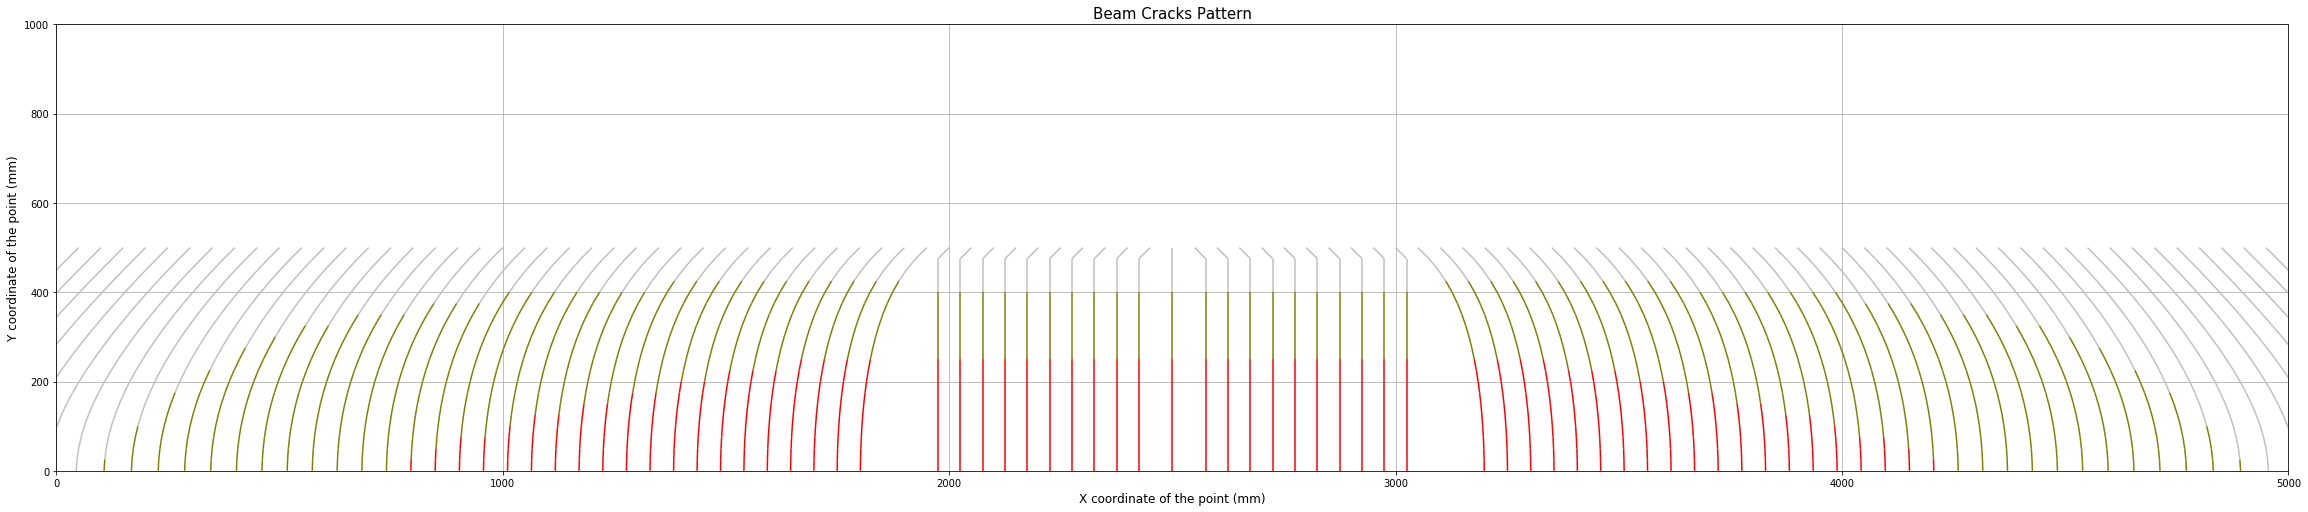

In [13]:
Yp = na
Xp = L

line = []
segment_colors = []


while Xp > 0 :
    Yp = 500
    X = Xp
    while Yp > 0 :
        structures_data = Stress (Xp, Yp)
        alfa = structures_data [6]
        m = tan(alfa)
        Ys = Yp - Δy
        Xs = X - (Δy/m)
        line.append([(X,Yp),(Xs,Ys)])
        if structures_data [3] >= uts*FoS :
            color = 'brown'
        elif structures_data [3] >= uts :
            color = 'red'
        elif structures_data [3] >= uts/FoS:
            color = 'olive'
        else :
            color = 'silver'
        segment_colors.append(color)
        X = Xs
        Yp = Ys
    Xp = Xp - Δx
    

    
lc = mc.LineCollection(line, colors= segment_colors, linewidths=1.5)
fig, ax = pl.subplots(figsize=(40,20))
ax.add_collection(lc)
ax.set_xlim((0,L))
ax.set_ylim((0,d))
ax.set_aspect(1)
ax.margins(0.1)
plt.title ('Beam Cracks Pattern', size = 15)
plt.xlabel ('X coordinate of the point (mm)', size = 12)
plt.ylabel ('Y coordinate of the point (mm)', size = 12)
plt.grid()
pl.savefig('Beam Cracks Pattern',	dpi=125)    

> **Considerations on the graph above** : 
The colorcode is the same one used in the previous graph. Each curved vertical line represents a crack and the red areas are the ones where the crack will actually happen. 

<img src="image-beam.png">

> **Considerations on the image above** : the drawing on the left states "shear flexural shear cracks" on the inclined crack because if the beam is reinforced as the one above the concrete will fail due to shear not tension; the crack pattern is very similar though. 
The image on the right shows the crack pattern in a beam with two identical loads: in the area between the loads the cracks have a vertical direction due to the absence of shear force (remember the shear force diagram) and start to have a inclined direction as we move away from the loads due to the influence of shear stress (Mohr's Circle analysis on the stress states).
Note that if we change the values of the load to make the asymmetrical or different than the cracks may be inclined even between the loads as the shear force is not zero. 

The code below is a variant of the code above. The difference is that, instead of the color coding, in this new graph I decided to plot only the micro-segments where the stress > strenght. 

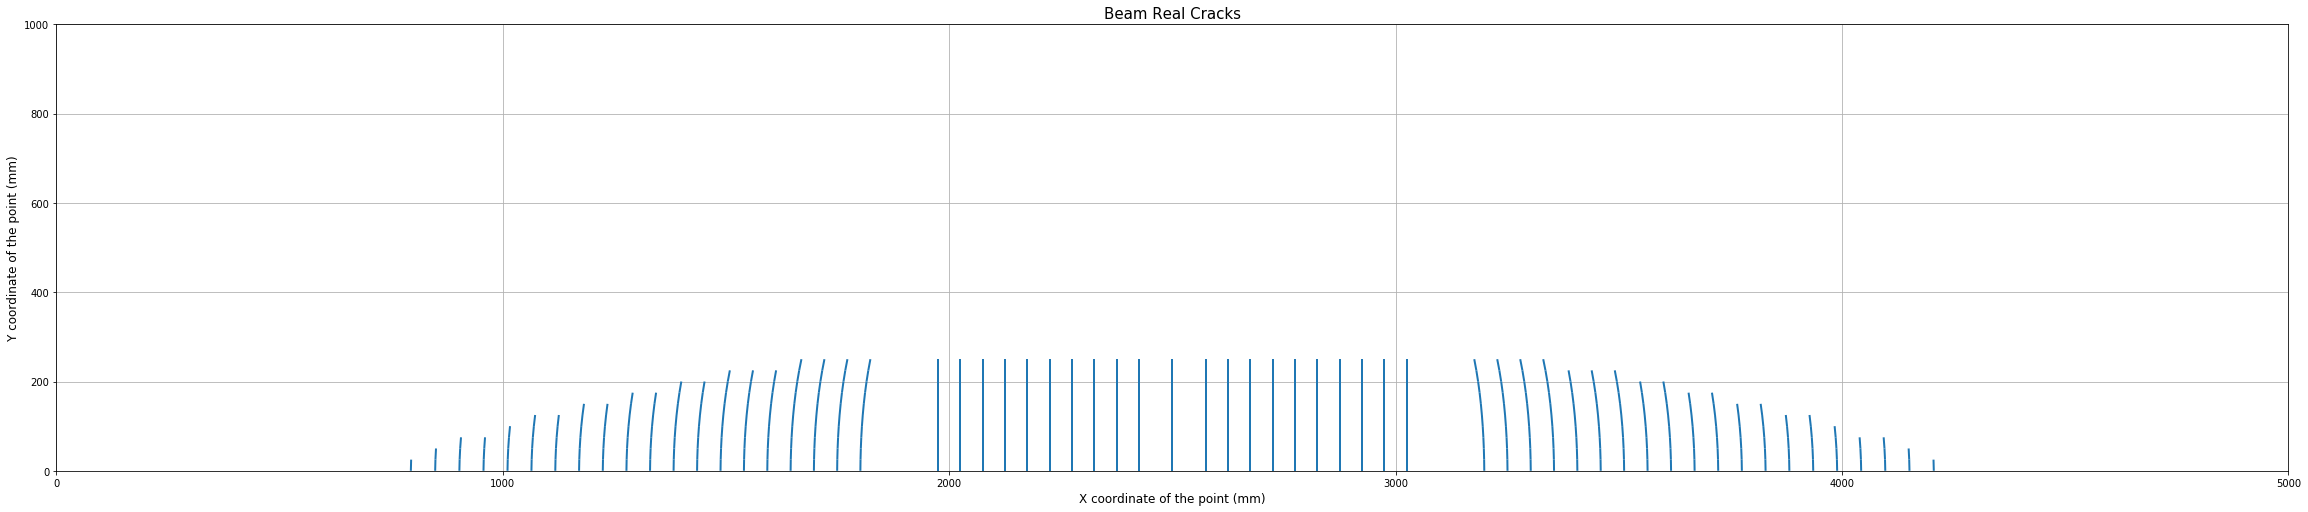

In [14]:
Yp = na
Xp = L
line = []

while Xp > 0 :
    Yp = 500
    X = Xp
    while Yp > 0 :
        structures_data = Stress (Xp, Yp)
        alfa = structures_data [6]
        m = tan(alfa)
        Ys = Yp - Δy
        Xs = X - (Δy/m)
        if structures_data [3] >= uts :
            line.append([(X,Yp),(Xs,Ys)])
        X = Xs
        Yp = Ys
    Xp = Xp - Δx
    
lc = mc.LineCollection(line, linewidths=2)
fig, ax = pl.subplots(figsize=(40,20))
ax.add_collection(lc)
#ax.autoscale()
ax.set_xlim((0,L))
ax.set_ylim((0,d))
ax.set_aspect(1)
ax.margins(0.1)
plt.title ('Beam Real Cracks', size = 15)
plt.xlabel ('X coordinate of the point (mm)', size = 12)
plt.ylabel ('Y coordinate of the point (mm)', size = 12)
plt.grid()
pl.savefig('Beam Real Cracks',	dpi=125)      

## Overall analysis on the material selection
This last part is designed to give the user an overall analysis of the materials and their efficiency. 
The process uses the minumum widgth (b) of the beam before the stress exceeds the permitted one. Then use this value to calculate the **Embodied Carbon Emissions**. 
In this way the user can plug in the materials available for him/her with their specifics (uts, density, CO2e...) and have an overall view of the most environmentally efficient material given the real life problem.

>**Note**: in this particular example the specifics for each material in the spreadsheet are just demostrative. (the values are representative but not reliable)

In [15]:
#calculations to find the b_min (the minumum width of the beam before it breaks or the workable value)

#Strength σmax = the max stress before it breaks (depends on the material)
#Working_Strength = the max stress under working conditions
#Ratio = Working_Strength / Strength

materials_Co2e = []

n = 1
while n < 13 :
    material = worksheet.cell(n,0).value
    
    #σmax = the uts the maximum tensile strength of each material
    σmax = worksheet.cell(n,1).value
    bmin = (6 * (-Mmax *(10**3)))/(σmax * (d**2))
    
    
    #density depends on the material
    density = worksheet.cell(n,2).value #kg/m^3
    
    #Weight = density * Volume 
    weight = density * bmin * d * L / 10**9
    #kg = kg/m^3 * mm * mm * mm / 10**9
    
    #CO2 emissions coeff depend on the material (excel)
    coeff = worksheet.cell(7,3).value
    C02e = coeff * weight
    
    
    materials_Co2e.append([material, bmin, C02e])
    n = n + 1

mynewdataframe = pd.DataFrame(materials_Co2e)
mynewdataframe.columns = "Materials", "Minimum Width", "Carbon Emissions (KgCO2/Kg)"

mynewdataframe

,Materials,Minimum Width,Carbon Emissions (KgCO2/Kg)
0,"Bricks, hard",214.285714,447.857143
1,"Bricks, light",2142.857143,1007.678571
2,"Brickwork, common quality",1714.285714,1522.714286
3,"Brickwork, best quality",285.714286,253.785714
4,Granite,125.000000,351.511875
5,Limestone,285.714286,650.885714
6,"Portand Concrete, 28 days old",428.571429,1074.857143
7,Sandstone,285.714286,693.581429
8,Slate,171.428571,286.628571
9,Trap rock,109.090909,199.044000


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Text xticklabel objects>)

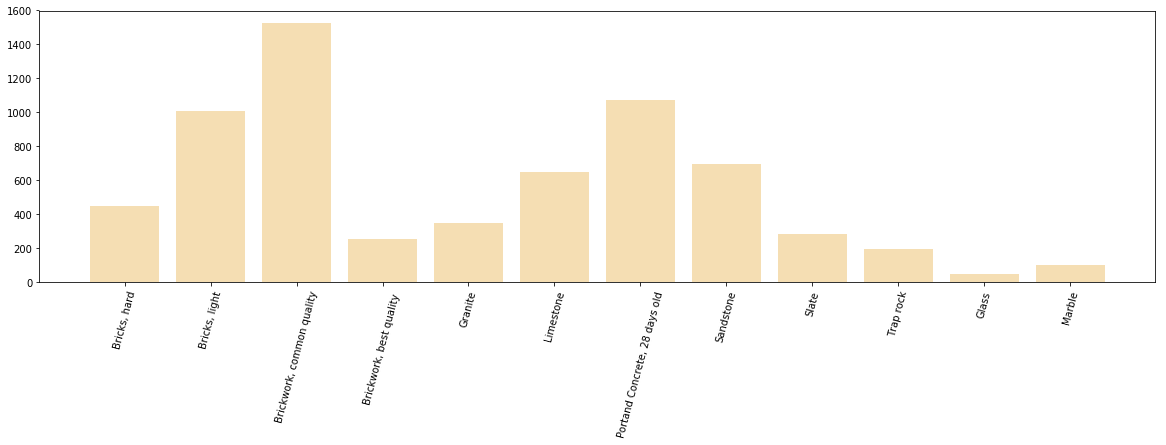

In [16]:
yvals = mynewdataframe["Carbon Emissions (KgCO2/Kg)"]

xvals = [1,2,3,4,5,6,7,8,9,10,11,12]
labels = mynewdataframe["Materials"]

f, ax = plt.subplots(figsize=(20,5))
plt.bar(xvals, yvals, width=0.8, color='wheat', tick_label=labels)
plt.xticks(rotation=75)

# Conclusion
To sum up, this code provides an overall **simulation and analysis of a real-life situation**. It is designed to help the user visualize how the stress due to the load is distributed along the beam and how cracks might develop. This is crucial in the **design thinking** process because the user can use this analysis to decide where to add composite materials or reinforcements more efficiently. The last part of the code is designed to help the user is the **material selection process**. 

>**Note** : if the user is more interested in the most cost-efficient material this can be found by plugging in the cost per Kg in the spreadsheet instead of the CO2e per Kg. In this way, the final graph will show the total cost required for each beam, built in the different materials in the spreadsheet.